1. Enliste todas las librerias que utilizará

In [45]:
#Importar librerías
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")
import scipy.stats  as stats
import numpy as np

2. Importación y revisión de los datos:


   Importe ambos sets. Dado que la fuente de datos proviene de la misma base,tienen las mismas columnas. Consolide ambos sets y reporte una exploración básica de los datos (numero de filas/columnas, tipos de datos, estadísticas básicas, casos perdidos)

In [2]:
#Importar librerías

df_2009 = pd.read_csv("2009_1perc.csv")
df_2010 = pd.read_csv("2010_1perc.csv")

In [3]:
#Info de los data set
print(df_2009.info())
print()
print(df_2010.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5812 entries, 0 to 5811
Columns: 112 entries, Unnamed: 0 to detailcm
dtypes: float64(1), int64(19), object(92)
memory usage: 5.0+ MB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6013 entries, 0 to 6012
Columns: 112 entries, Unnamed: 0 to detailcm
dtypes: int64(17), object(95)
memory usage: 5.1+ MB
None


In [4]:
#Describe df_2009
print(df_2009.describe())
print()
print(df_2009.describe(include = "object"))

          Unnamed: 0    year          pct       ser_num      datestop  \
count    5812.000000  5812.0  5812.000000   5812.000000  5.812000e+03   
mean   291666.632485  2009.0    69.051617   5769.119924  6.255350e+06   
std    167435.992474     0.0    32.846903   5524.955522  3.447243e+06   
min        52.000000  2009.0     1.000000      1.000000  1.012009e+06   
25%    147489.750000  2009.0    42.000000   1902.750000  3.172009e+06   
50%    292821.500000  2009.0    73.000000   4347.000000  6.142009e+06   
75%    436008.750000  2009.0   102.000000   7616.750000  9.192009e+06   
max    580847.000000  2009.0   123.000000  31694.000000  1.231201e+07   

          timestop       perobs      perstop  compyear  comppct       repcmd  \
count  5812.000000  5812.000000  5812.000000    5812.0   5812.0  5812.000000   
mean   1426.219202     2.665893     5.501893       0.0      0.0   252.115795   
std     736.239726     4.816704     5.922592       0.0      0.0   305.058678   
min       0.000000    

In [5]:
#Describe df_2010
print(df_2010.describe())
print()
print(df_2010.describe(include = "object"))

          Unnamed: 0    year          pct       ser_num      datestop  \
count    6013.000000  6013.0  6013.000000   6013.000000  6.013000e+03   
mean   300156.684184  2010.0    68.213870   5629.246300  6.469452e+06   
std    173941.822364     0.0    33.218863   4764.331369  3.408437e+06   
min       135.000000  2010.0     1.000000      1.000000  1.012010e+06   
25%    147573.000000  2010.0    42.000000   2071.000000  3.302010e+06   
50%    299643.000000  2010.0    72.000000   4393.000000  6.182010e+06   
75%    450268.000000  2010.0   102.000000   8038.000000  9.262010e+06   
max    601281.000000  2010.0   123.000000  28078.000000  1.231201e+07   

          timestop       perobs      perstop  compyear  comppct       repcmd  \
count  6013.000000  6013.000000  6013.000000    6013.0   6013.0  6013.000000   
mean   1401.649426     2.643273     5.792283       0.0      0.0   234.886912   
std     752.702505    12.840711    12.383224       0.0      0.0   290.362984   
min       0.000000    

In [6]:
#Casos perdidos
print(df_2009.isna().sum())
print()
print(df_2010.isna().sum())

Unnamed: 0    0
year          0
pct           0
ser_num       0
datestop      0
             ..
xcoord        0
ycoord        0
dettypcm      0
linecm        0
detailcm      0
Length: 112, dtype: int64

Unnamed: 0    0
year          0
pct           0
ser_num       0
datestop      0
             ..
xcoord        0
ycoord        0
dettypcm      0
linecm        0
detailcm      0
Length: 112, dtype: int64


In [7]:
#Comparar tipos de datos de df's
# Obtener los tipos de datos de cada DataFrame
dtypes1 = df_2009.dtypes
dtypes2 = df_2010.dtypes

# Comparar los tipos de datos columna por columna
diferentes = []
for columna in dtypes1.index:
    if dtypes1[columna] != dtypes2[columna]:
        diferentes.append(columna)

# Imprimir las columnas con tipos de datos diferentes
if len(diferentes) == 0:
    print("Los tipos de datos son iguales en todas las columnas.")
else:
    print("Los tipos de datos son diferentes en las siguientes columnas:")
    for columna in diferentes:
        print(columna)

Los tipos de datos son diferentes en las siguientes columnas:
perobs
addrpct
linecm
detailcm


In [8]:
#Revisar el tipo de datos de variables no coincidentes
print(f"perobs 2009: {df_2009['perobs'].dtype}, perobs 2010: {df_2010['perobs'].dtype}")
print(f"addrpct 2009: {df_2009['addrpct'].dtype}, addrpct 2010: {df_2010['addrpct'].dtype}")
print(f"linecm 2009: {df_2009['linecm'].dtype}, linecm 2010: {df_2010['linecm'].dtype}")
print(f"detailcm 2009: {df_2009['detailcm'].dtype}, detailcm 2010: {df_2010['detailcm'].dtype}")

perobs 2009: float64, perobs 2010: int64
addrpct 2009: int64, addrpct 2010: object
linecm 2009: int64, linecm 2010: object
detailcm 2009: int64, detailcm 2010: object


In [9]:
#Transformar todas las variables no concordantes en object
df_2009['perobs'] = df_2009['perobs'].astype(object)
df_2010['perobs'] = df_2010['perobs'].astype(object)
df_2009['addrpct'] = df_2009['addrpct'].astype(object)
df_2010['addrpct'] = df_2010['addrpct'].astype(object)
df_2009['linecm'] = df_2009['linecm'].astype(object)
df_2010['linecm'] = df_2010['linecm'].astype(object)
df_2009['detailcm'] = df_2009['detailcm'].astype(object)
df_2010['detailcm'] = df_2010['detailcm'].astype(object)

In [10]:
df_consolidado = pd.concat([df_2009, df_2010], ignore_index=True)
df_consolidado.head(5)

,Unnamed: 0,year,pct,ser_num,datestop,timestop,recstat,inout,trhsloc,perobs,...,zip,addrpct,sector,beat,post,xcoord,ycoord,dettypcm,linecm,detailcm
0,178048,2009,41,1779,4032009,130,A,O,P,1.0,...,,41,G,7,,1013067,0238633,CM,1,20
1,498873,2009,108,5805,10292009,1050,A,O,P,3.0,...,,108,J,,,1012043,0212157,CM,1,14
2,463573,2009,43,8340,10062009,1450,1,O,P,1.0,...,,43,E,,,1017599,0240200,CM,1,20
3,43626,2009,77,932,1232009,1843,A,O,P,5.0,...,,77,J,4,35,1002625,0183442,CM,1,24
4,563921,2009,110,11224,12132009,1655,A,O,P,3.0,...,,110,H,,,1024535,0209890,CM,1,20


In [11]:
#Revisar el tipo de datos de variables no coincidentes
print(f"perobs consolidado: {df_consolidado['perobs'].dtypes}")
print(f"addrpct consolidado: {df_consolidado['addrpct'].dtypes}")
print(f"linecm consolidado: {df_consolidado['linecm'].dtypes}")
print(f"detailcm consolidado: {df_consolidado['detailcm'].dtypes}")

perobs consolidado: object
addrpct consolidado: object
linecm consolidado: object
detailcm consolidado: object


In [12]:
#Castear a numeric
df_consolidado['perobs'] = pd.to_numeric(df_consolidado["perobs"], errors='coerce')
df_consolidado['addrpct'] = pd.to_numeric(df_consolidado['addrpct'], errors='coerce')
df_consolidado['linecm'] = pd.to_numeric(df_consolidado['linecm'], errors='coerce')
df_consolidado['detailcm'] = pd.to_numeric(df_consolidado['detailcm'], errors='coerce')


In [13]:
#Eliminar NA
#df_consolidado = df_consolidado.dropna(axis = 0)

3. Preprocesamiento de datos:

   Habrá notado que los datos parecen tener ciertas inconsistencias. Siga los siguientes pasos para limpiar este set:
   1. Obtenga una lista con todas las variables categoricas que tengan entre 2 y 99 categorías (inclusive). (hint: son las variables tipo categoricas

In [14]:
#Filtrar categóricas
variables_categoricas = df_consolidado.select_dtypes(include=['object'])
variables_categoricas

,recstat,inout,trhsloc,crimsusp,typeofid,explnstp,othpers,arstmade,arstoffn,sumissue,...,aptnum,city,state,zip,sector,beat,post,xcoord,ycoord,dettypcm
0,A,O,P,CPW,P,Y,N,N,,N,...,,BRONX,,,G,7,,1013067,0238633,CM
1,A,O,P,BURG,P,Y,Y,N,,N,...,,QUEENS,,,J,,,1012043,0212157,CM
2,1,O,P,MISD,V,Y,N,N,,N,...,,BRONX,,,E,,,1017599,0240200,CM
3,A,O,P,MIS,P,Y,N,N,,N,...,,BROOKLYN,,,J,4,35,1002625,0183442,CM
4,A,O,P,CPW,P,Y,Y,N,,N,...,,QUEENS,,,H,,,1024535,0209890,CM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11820,1,O,H,MISD,P,Y,N,N,,N,...,,BROOKLYN,,,I,,,989382,155162,CM
11821,A,O,P,ROBBERY,R,Y,N,N,,N,...,,BROOKLYN,,,A,,,1012757,186018,CM
11822,A,O,P,GLA,P,Y,N,N,,Y,...,,STATEN IS,,,E,,,933868,138600,CM
11823,1,O,P,FELONY,P,Y,N,N,,N,...,,QUEENS,,,E,,,1014722,214388,CM


In [22]:
#Listar las que tienen entre 2 y 99 categorías
valores_distintos = variables_categoricas.nunique()
var_filtradas = valores_distintos[(valores_distintos > 2) & (valores_distintos < 99)]
var_filtradas

trhsloc      4
typeofid     4
sex          3
race         8
haircolr    11
eyecolor    11
build        5
city         7
sector      19
beat        64
dtype: int64

 B. Reemplaze las siguientes clases faltantes: -Si alguna categoría de las columnas officrid, offshld o offverb es igual a ""
cambielo a 'N' y en caso contrario dejelo como 'Y' -Si alguna categoría de las columnas sector, trhsloc o beat es igual a "" (o NA, dependiendo de como haya catgado la base de datos), cambielo a 'U' y en caso contrario mantenga su valor Nota, los valores significan {N: No, Y: Yes, U: Unknown}

In [17]:
#Revisar si las variables continen NA o ""
print(df_consolidado["officrid"].isna().sum())
print(" "in df_consolidado["officrid"].values)
print(df_consolidado["offshld"].isna().sum())
print(" "in df_consolidado["offshld"].values)
print(df_consolidado["offverb"].isna().sum())
print(" "in df_consolidado["offverb"].values)
print(df_consolidado["sector"].isna().sum())
print(" "in df_consolidado["sector"].values)
print(df_consolidado["trhsloc"].isna().sum())
print(" "in df_consolidado["trhsloc"].values)
print(df_consolidado["beat"].isna().sum())
print(" "in df_consolidado["beat"].values)


0
True
0
True
0
True
0
True
0
True
0
True


In [18]:
#cambiar variables
reemplazo = {" ": "N"}
df_consolidado["officrid"] = df_consolidado["officrid"].replace(reemplazo)
df_consolidado["offshld"] = df_consolidado["offshld"].replace(reemplazo)
df_consolidado["offverb"] = df_consolidado["offverb"].replace(reemplazo)

reemplazo_1 = {" ": "U"}
df_consolidado["sector"] = df_consolidado["sector"].replace(reemplazo_1)
df_consolidado["trhsloc"] = df_consolidado["trhsloc"].replace(reemplazo_1)
df_consolidado["beat"] = df_consolidado["beat"].replace(reemplazo_1)

3.3 Transforme las columnas ht_feet junto con ht_inch en una única columna (de la forma "ht_feet.ht_inch") llamado 'meters' (hint: transforme con el siguiente cálculo: metros = (pies+pulgadas)*0.3048)

In [19]:
df_consolidado["meters"] = (df_consolidado["ht_feet"] + df_consolidado["ht_inch"])*0.3048

3.4 Note que la fecha viene en un formato MMDDAAAA en la columna datestop. Genere 2 nuevas columnas llamadas month y year que solo tenga el mes y el año respectivamente. Hint: Explore la libreria lubridate https://www.rstudio.com/resources/cheatsheets/

In [20]:
# Convertir la columna 'Fecha' a formato datetime
df_consolidado['datestop'] = pd.to_datetime(df_consolidado['datestop'] , format='%m%d%Y')

# Obtener columnas separadas de mes y año
df_consolidado['Mes'] = df_consolidado['datestop'].dt.month
df_consolidado['Año'] = df_consolidado['datestop'].dt.year

# Mostrar el DataFrame resultante
print(df_consolidado.head(5))

   Unnamed: 0  year  pct  ser_num   datestop  timestop recstat inout trhsloc  \
0      178048  2009   41     1779 2009-04-03       130       A     O       P   
1      498873  2009  108     5805 2009-10-29      1050       A     O       P   
2      463573  2009   43     8340 2009-10-06      1450       1     O       P   
3       43626  2009   77      932 2009-12-03      1843       A     O       P   
4      563921  2009  110    11224 2009-12-13      1655       A     O       P   

   perobs  ... beat  post   xcoord   ycoord dettypcm linecm detailcm  meters  \
0     1.0  ...    7        1013067  0238633       CM    1.0     20.0  4.2672   
1     3.0  ...    U        1012043  0212157       CM    1.0     14.0  3.0480   
2     1.0  ...    U        1017599  0240200       CM    1.0     20.0  2.7432   
3     5.0  ...    4    35  1002625  0183442       CM    1.0     24.0  3.0480   
4     3.0  ...    U        1024535  0209890       CM    1.0     20.0  3.3528   

  Mes   Año  
0   4  2009  
1  10  200

3.5 Filtre su DataFrame y solo deje las columnas seleccionadas en el punto 3.1, el mes, el año, los metros y la edad. Luego solo deje los registros cuyas edades esten entre 18 y 100 años, ambos inclusive.

In [31]:
#Crear lista con las variables a considerar
variables = var_filtradas.index.tolist()
variables.append("Mes")
variables.append("meters")
variables.append("Año")
variables.append("age")

#Generar nuevo df solo con variables seleccionadas
df_filtrado = df_consolidado[variables]

#Filtrar por edad
df_filtrado = df_filtrado[(df_filtrado['age'] >= 18) & (df_filtrado['age'] <= 100)]

df_filtrado.head(5)

,trhsloc,typeofid,sex,race,haircolr,eyecolor,build,city,sector,beat,Mes,meters,Año,age
0,P,P,M,B,BK,BR,M,BRONX,G,7,4,4.2672,2009,24
2,P,V,M,Q,BR,BR,M,BRONX,E,U,10,2.7432,2009,21
3,P,P,M,B,BK,BR,T,BROOKLYN,J,4,12,3.0480,2009,22
4,P,P,M,Q,BK,BR,M,QUEENS,H,U,12,3.3528,2009,18
5,T,V,M,B,BK,BR,M,MANHATTAN,F,16,5,3.9624,2009,47


4.1 Estudie la variable respuesta por si sola (arstmade), puede ayudarse de un gráfico. Comente

In [33]:
print(df_consolidado["arstmade"].describe()) #descriptivo variable
print()
print(df_consolidado["arstmade"].value_counts()) #cantidad de registros por categoría

count     11825
unique        2
top           N
freq      11077
Name: arstmade, dtype: object

N    11077
Y      748
Name: arstmade, dtype: int64


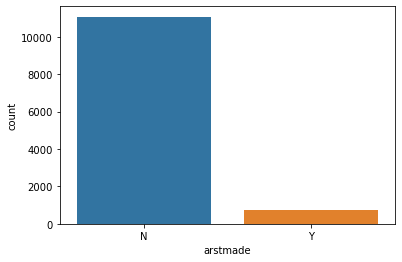

In [40]:
#gráfica de arstmade
sns.countplot(df_consolidado["arstmade"])
plt.show()

4.2.- Estudie la relación de la variable respuesta en comportamiento con la raza (race), comente.

In [41]:
#Observar variable race
print(df_consolidado["race"].describe()) #descriptivo variable
print()
print(df_consolidado["race"].value_counts()) #cantidad de registros por categoría

count     11825
unique        8
top           B
freq       6331
Name: race, dtype: object

B    6331
Q    2922
W    1118
P     671
A     364
Z     289
U      78
I      52
Name: race, dtype: int64


In [47]:
# Calcular coef de independencia chi cuadrado
race_arstmade = np.array(pd.crosstab(df_consolidado["race"], df_consolidado["arstmade"]))
X2 = round(stats.chi2_contingency(race_arstmade, correction=False) [0],5) #Obtención Chi cuadrado
p = round(stats.chi2_contingency(race_arstmade, correction=False) [1],5) #Obtención p_value prueba de indepencencias
n = np.sum(race_arstmade)
minDim = min(race_arstmade.shape)-1
V = round(np.sqrt((X2/n)/minDim),5) #cálculo V de Cramer   
print (f"La correlación Chi cuadrado entre Race y arstmade es de: {X2} con un p-value de: {p}")
print(f"El valor V de Cramer es de: {V}")

La correlación Chi cuadrado entre Race y arstmade es de: 3.59276 con un p-value de: 0.8253
El valor V de Cramer es de: 0.01743


Considerando un $\alpha = 0.05$ no existe evidencia suficiente para rechazar la hipótesis nula. Por lo tanto, no existe asociación entre las variables.

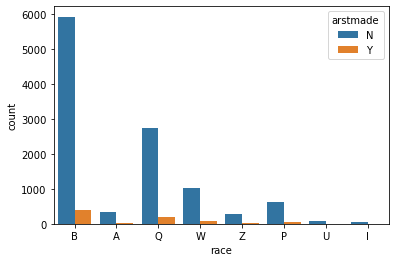

In [54]:
#gráfico de comportamiento

sns.countplot(df_consolidado["race"], hue = df_consolidado["arstmade"])
plt.show()

4.3 Estudie la relación de la variable respuesta en comportamiento con la sexo (sex), comente.

In [55]:
#Observar variable race
print(df_consolidado["sex"].describe()) #descriptivo variable
print()
print(df_consolidado["sex"].value_counts()) #cantidad de registros por categoría

count     11825
unique        3
top           M
freq      10873
Name: sex, dtype: object

M    10873
F      777
Z      175
Name: sex, dtype: int64


In [56]:
# Calcular coef de independencia chi cuadrado
sex_arstmade = np.array(pd.crosstab(df_consolidado["sex"], df_consolidado["arstmade"]))
X2 = round(stats.chi2_contingency(sex_arstmade, correction=False) [0],5) #Obtención Chi cuadrado
p = round(stats.chi2_contingency(sex_arstmade, correction=False) [1],5) #Obtención p_value prueba de indepencencias
n = np.sum(sex_arstmade)
minDim = min(sex_arstmade.shape)-1
V = round(np.sqrt((X2/n)/minDim),5) #cálculo V de Cramer   
print (f"La correlación Chi cuadrado entre sex y arstmade es de: {X2} con un p-value de: {p}")
print(f"El valor V de Cramer es de: {V}")

La correlación Chi cuadrado entre sex y arstmade es de: 16.22822 con un p-value de: 0.0003
El valor V de Cramer es de: 0.03705


Considerando un $\alpha = 0.05$ se rechaza la hipotencias nula; por lo tanto, las variable no son independientes. Sin embargo, considerando el tamaño del efecto, a través del V de Cramer, la asociación es débil.

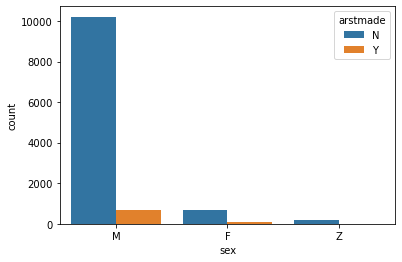

In [57]:
#gráfico de comportamiento

sns.countplot(df_consolidado["sex"], hue = df_consolidado["arstmade"])
plt.show()

4.3 Estudie la relación de la variable respuesta en comportamiento con la sexo y la edad en su conjunto, comente.

In [76]:
# Definir X y Y
x = df_consolidado[["sex", "age"]]
x = pd.get_dummies(x, drop_first=True)
y = df_consolidado["arstmade"]
model = LogisticRegression(max_iter=1000)

# Train the model
model.fit(x, y)

#Model coef
coefficients = model.coef_
intercept = model.intercept_[0]

predictors = x.columns.tolist()
predictors.append("const")

coefficients = coefficients[0].tolist()
coefficients.append(intercept)


coef = pd.Series(coefficients, predictors).sort_values()

print(coef)

const   -2.266800
sex_Z   -0.696704
sex_M   -0.475993
age      0.000427
dtype: float64


La variable sex se relaciona de manera negativa con el target arstmade y la edad de manera positiva. Sin embargo, hay que considerar que para ver el efecto real es necesario obtener los odds.

4.4 Recodifique la variable respuesta a 1 y 0. Donde 0 es N y 1 es Y

In [77]:
reemplazo_target = {"N": 0, "Y":1} #definir valores de reemplazo
df_consolidado["arstmade"] = df_consolidado["arstmade"].replace(reemplazo_target) #realizar reemplazo de valores
df_consolidado["arstmade"].value_counts() #verificar el cambio

0    11077
1      748
Name: arstmade, dtype: int64

4.5 Muestre en un gráfico la probabilidad que un individuo sea arrestado,condicional al género y a la raza. ¿qué implicancias éticas tienen algunas conclusiones de lo que observa?.

In [116]:
# Calcular la probabilidad condicional de arresto por género y raza

# Graficar la probabilidad condicional

import pandas as pd

# Calcular la probabilidad condicional de arresto por género y raza
probabilidad_condicional = df_consolidado.groupby(['sex', 'race'])['arstmade'].mean().reset_index()
probabilidad_condicional = probabilidad_condicional[probabilidad_condicional["arstmade"] != 0]

# Calcular las probabilidades previas de género y raza
prob_prior_genero = (df_consolidado['sex'].value_counts() / len(df_consolidado)).reset_index()
prob_prior_raza = (df_consolidado['race'].value_counts() / len(df_consolidado)).reset_index()

# Combinar las probabilidades condicionales y previas
prob_arresto_condicional = probabilidad_condicional.merge(prob_prior_genero, left_on="sex", right_index = "index", how='left')
# prob_arresto_condicional = prob_arresto_condicional.merge(prob_prior_raza, on='race', how='left')
# prob_arresto_condicional['probability'] = prob_arresto_condicional['arstmade'] * prob_arresto_condicional['sex'] * prob_arresto_condicional['race']
# prob_arresto_condicional = prob_arresto_condicional.groupby(['sex', 'race'])['probability'].sum().reset_index()

# # Crear el gráfico de barras
# plt.figure(figsize=(8, 6))
# prob_arresto_condicional.plot(kind='bar', x='race', y='probability', stacked=True)

# # Personalizar el gráfico
# plt.xlabel('Raza')
# plt.ylabel('Probabilidad de Arresto')
# plt.title('Probabilidad de Arresto condicional al Género y a la Raza')

# # Mostrar el gráfico
# plt.show()
probabilidad_condicional
prob_prior_genero

ValueError: right_index parameter must be of type bool, not <class 'str'>